# LED-Potentiometer

In this project we will make a circuit consisting of a an LED whose brightness is controlled by a potentiometer.  The circuit is of the form:  $E--R--R_1//(R_2--D)$.  The resistance of the potentiometer, denoted as '$R_\mathrm{p}$', is divided into two, $R$ and $R_1$.  The value of each is detetermined by the direction of the knob of the potentiometer, denoted as '$\theta$'.  Please note that the LED is denoted as '$D$' in the circuit description.

\begin{equation}\tag{1}
    R+R_1 = R_\mathrm{p}
\end{equation}    

Via KVL and Ohm's Law,  

\begin{equation}\tag{2}
    R_1I_1 = R_2I_2
\end{equation}    

and,
\begin{equation}\tag{3}
    E - RI - R_1I_1 = 0
\end{equation}    

Via KCL,  

\begin{equation}\tag{4}
    I = I_1 + I_2
\end{equation}    

Now let's find the transfer function that maps $E$ to $I_2$.  Via equations (4) and (3),  

$$E - R(I_1+I_2) - R_1I_1 = 0$$

$$ I_1(R_1+R) = E - RI_2$$

\begin{equation}\tag{5}
    I_1 = \frac{E-RI_2}{R_1+R}
\end{equation}    

Via equations (5) and (2),  

$$ R_2I_2(R_1+R) = R_1(E-RI_2)$$

$$ R_2I_2(R_1+R) + RR_1I_2 = R_1E $$

$$ I_2\big(R_2(R_1+R) + RR_1\big) = R_1E$$

Thus,
\begin{equation}\tag{6}
    I_2:=I_2(E\vert R, R_1, R_2) = \frac{ER_1}{R_2(R_1+R)+RR_1}
\end{equation}    

Via equation (6) and the fact that $R = R_\mathrm{p} - R_1$,  

\begin{equation}\tag{6a}
    I_2 := I_2(E\vert R_\mathrm{p}, R_1, R_2) = I_2(E\vert R_\mathrm{p}-R_1, R_1, R_2) = \frac{ER_1}{R_2R_\mathrm{p} + R_1(R_\mathrm{p}-R_1)}
\end{equation}    

Now lets redefine $I_2$ to make $E$ a parameter and $R_1$ the variable.

\begin{equation}\tag{6b}
    I_2 := I_2(R_1\vert E, R_\mathrm{p}, R_2) = \frac{ER_1}{R_2R_\mathrm{p} + R_1(R_\mathrm{p}-R_1)}
\end{equation}    

Next, lets define a function that maps $\theta$ to $R_1$, assuming that $R_1$ is proportional to $\theta$.  

\begin{equation}\tag{7}
    R_1 := R_1(\theta) := \frac{\theta}{2\pi}\,R_\mathrm{p}
\end{equation}    

Finally, lets compose the functions identified in equations (6b) and (7) into one function.  

$$ I_2 := I_2(\theta\vert E, R_\mathrm{p}, R_2):=I_2(R_1(\theta)|E, R_\mathrm{p},R_2) = I_2(R_1\vert E, R_\mathrm{p},R_2)\circ R_1(\theta)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

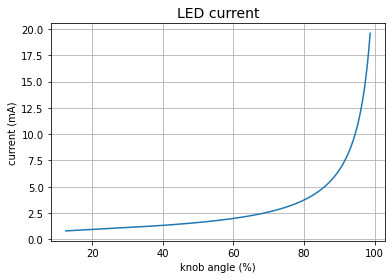

In [2]:
# Set the parameters
E = 9
R_p = 1e4
R_2 = 330

# Set the domain of the function
theta = np.linspace(0.125*np.pi, np.pi*(1-0.0125), num=200)

# Define the functions
R_1 = R_p*(theta)/(np.pi)
I_2 = E*R_1/(R_2*R_p + R_1*(R_p-R_1))

# Create fig and axes.
fig, ax = plt.subplots()
ax.set_title('LED current', size=14)
ax.set_ylabel('current (mA)')
ax.set_xlabel('knob angle (%)')
ax.grid()

# Plot the data.
ax.plot(100*theta/(np.pi), 1000*I_2)

### Application
Assuming $R_1=R_\mathrm{p}$,  

$$ I_2 = \frac{E}{R_2}$$

And, assuming $I_2=20\mathrm{mA}$ and $E=9\mathrm{V}$,  

$$ R_2 = \frac{9\mathrm{V}}{0.02\mathrm{A}} = 450\Omega$$

In [3]:
9/0.02

450.0

$$ I_2 = \frac{9\mathrm{V}}{560\Omega} \approxeq 16.07\mathrm{mA}$$

In [4]:
9/560

0.01607142857142857

In [5]:
1000*9/330

27.272727272727273